# Control of Bio-processes

Wastewater treatment course: modelling and control workshop Copyright (C) 2022, TU Delft, {A.Moradvandi, E.Kruisdij}@tudelft.nl.

Reference: Dochain, Denis, ed. Automatic control of bioprocesses. John Wiley & Sons.


The aim is design/implement a basic control (Porpotioanl-Integral (*PI*) controller) for a simple bioprocess.
The process is the growth of a biomass on a substrate in a strirred tank reactor. This reaction is schematically
described in the following form:

$$
    S \to X
$$

where $S$ represents the substrate and $X$ the biomass.




*Areas in the code to be modified are indicated by* 

 <font color='red'>---------------------------- Start Modifying Code Here ----------------------------- </font>

 <font color='red'>The existing (incomplete) code in the modifiable areas serves as a hint</font>

 <font color='red'>---------------------------- End Modifying Code Here ------------------------------</font> 

In [1]:
## import packages
import numpy as np                  # numerical calculations in python
import matplotlib.pyplot as plt     # plotting similar to matlab
from scipy.integrate import odeint  # solver for differential equations
import math                         # mathematical functions

**Model Description**

The dynamics representing the bioreactor with the defined reaction can be written as follows:

$$
    \begin{align}
        \frac{dS}{dt} &= \frac{F_{in}}{V} (S_{in}-S) - \frac{1}{Y_{X/S}} \mu X \\
        \frac{dX}{dt} &= \mu X - \frac{F_{in}}{V} X \\
        \frac{dV}{dt} &= F_{in} - F_{out}
    \end{align}
$$

where $F_{in}$ ($l/h$) is the reactor’s feed rate, $F_{out}$ ($l/h$) the withdrawal rate, $V(t)$ ($l$) the reactor’s active volume, $S_{in}$ the substrate concentration at the reactor inlet, $Y_{X/S}$ the yield coefficient of the biomass on the substrate and $\mu$ the biomass specific growth rate.

Dilution rate $D$ ($1/h$) is defined as the ratio of feed rate Fin to reactor volume $V$ as follows:

$$
    D = \frac{F_{in}}{V}
$$

therefore, the dynamics can be rewritten as follows:

$$
    \begin{align}
        \frac{dS}{dt} &= D (S_{in}-S) - \frac{1}{Y_{X/S}} \mu X \\
        \frac{dX}{dt} &= \mu X - D X \\
        \frac{dV}{dt} &= DV - F_{out}
    \end{align}
$$

The specific growth rate $\mu$ is considered as Haldane expression as

$$
    \mu = \frac{\overline{\mu}S}{K_S + S + S^2/K_I}
$$

where $K_S$ is Monod’s constant, $K_I$ is the inhibition constant and $\overline{\mu}$ is related to the maximum specific growth rate, $\mu_{max}$, using the following expression:

$$
    \overline{\mu} = \mu_{max}\left(1 + 2 \sqrt{\frac{K_S}{K_I}} \right)
$$

**Model Parameters**

The parameters are given as follows:

| Parameter | Value | Unit |
| :- | :- | :- |
| Yield coefficient ($Y_{X/S}$) | $0.4$ |  |
| Maximum growth rate ($\mu_{max}$) | $0.53$ | $h^{-1}$ |
| Monod’s constant ($K_S$) | $1.2$ | $g/l$ |
| inhibition constant ($K_I$) | $0.22$ | $g/l$ |


In [2]:
## define parameters

#--------- Start Modifying Code Here -----------
Y_XS          =                                                                    # Yield_XtoS
mu_max        =                                                                   # MaximumGrowthRate  [h-1]
K_S           =                                                                    # MonodConstant      [g/l]
K_I           =                                                                   # InhibitionConstant [g/l] 
mu_bar        = mu_max*(1 + 2*math.sqrt(K_S/K_I))                                     # GrowthRate
#--------- End Modifying Code Here -----------

The specific growth rate $\mu$ is considered as Haldane expression as

$$
    \mu = \frac{\overline{\mu}S}{K_S + S + S^2/K_I}
$$

In [3]:
## Haldane Expression

def mu(s):
    
    #--------- Start Modifying Code Here -----------
    mu =                       #Haldane Expression
    #--------- End Modifying Code Here -----------
    
    return mu

The given mechanistic model is as follows:

$$
    \begin{align}
        \frac{dS}{dt} &= D (S_{in}-S) - \frac{1}{Y_{X/S}} \mu X \\
        \frac{dX}{dt} &= \mu X - D X \\
        \frac{dV}{dt} &= DV - F_{out}
    \end{align}
$$

**Equilibrium point:**
In this example, based on the definition of equilibrium point, they can be calculated  for the given constant inputs, i.e. $\overline{D}$ and $\overline{S}_{in}$ as follows:

$$
    \begin{align}
        \frac{dS}{dt} &= \overline{D} (\overline{S}_{in}-S) - \frac{1}{Y_{X/S}} \mu X = 0 \\
        \frac{dX}{dt} &= \mu X - \overline{D} X = 0
    \end{align}
$$

From the latter equation, it can be seen that there can be basically two equilibrium points. One of them corresponds to $X = 0$. This refers to the case, when there is wash-out of the bioreactor. It defines the situation in which the quantity of biomass removed from the reactor over the course of a given period exceeds the quantity of biomass developed in the course of this period. This occurs when $\overline{D} > \mu_{max}$, which is an undesirable equilibrium point. And the other one gives $\mu = \overline{D}$. And by considering this we can get $X = \frac{1}{Y_{X/S}}(\overline{S}_{in} - S)$. By doing some mathematical analysis we can categorize equilibrium point as follows:

- equilibrium point corresponding to the wash-out of the reactor $X_{equ} = 0$ and $S_{equ} = \overline{S}_{in}$;
    
- stable equilibrium point $X_{equ} = \frac{1}{Y_{X/S}}(\overline{S}_{in} - S_{equ})$ with $S_{equ} < \sqrt{K_S K_I}$;
    
- unstable equilibrium point $X_{equ} = \frac{1}{Y_{X/S}}(\overline{S}_{in} - S_{equ})$ with $S_{equ} > \sqrt{K_S K_I}$;


To investigate the dynamics of the process and equilibrium points, change the volume of the reactor based on the data given below to see different equilibrium points:

| Volume | Inlet flow | Outlet flow | dilution rate |
| :- | :- | :- | :- |
| $2$ | $2$ | $2$ | $1$ |
| $5$ | $2$ | $2$ | $0.4$ |
| $10$ | $2$ | $2$ | $0.2$ |

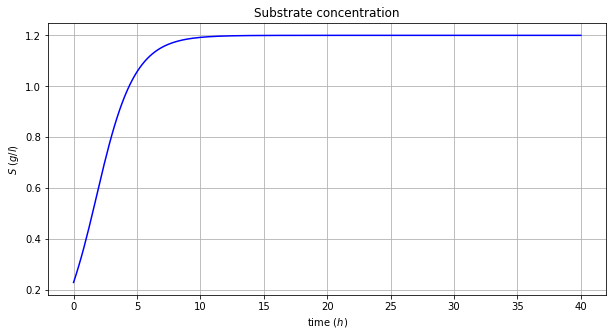

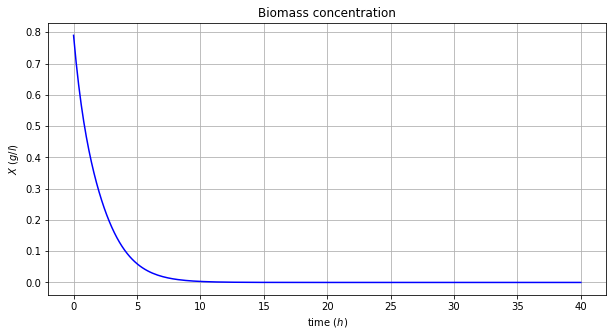

In [4]:
## Define initial conditions

InitialS            = 0.23   # Initial S concentration [g/l] 
InitialX            = 0.79   # Initial X concentration [g/l]

#--------- Start Modifying Code Here -----------
InitialV            =       # Initial volume [ l ]
#--------- End Modifying Code Here -----------
    
Initialx_int        = 0      # Initial action for integral part of the controller

InitialConditions = [
    InitialS,
    InitialX,
    InitialV,
    Initialx_int
    ]

## Define model inputs 

InputS            = 1.2  # Input S concentration [g/l] 
InputX            = 0    # Input X concentration [g/l]
InputF            = 2    # Input flowrate [h-1] 
OutputF           = 2    # Output flowrate [h-1] 

Inputs = [
    InputS,
    InputX,
    InputF,
    OutputF
    ]


## Dynamical Model without controller


def BiomassGrowth(x,t):
    
    # Definition of state variables: x[0]: S ; x[1]: X; x[2]: V
    
    # Define dilution rate
    D = InputF/x[2]
    
    # Define balances
    #--------- Start Modifying Code Here -----------
    
    dS =                                     # S mass balance
    dX = mu(x[0]) * x[1] - D * x[1]                                # X mass balance
    
    #--------- End Modifying Code Here -----------
    dV = D*x[2] - OutputF
    
    return [dS, dX, dV, 0]

## solve the model

# time steps
ts = np.linspace(0,40,200)

# solver
x = odeint(BiomassGrowth,InitialConditions,ts)

## plot the results

# figure#1 - substrate concentration per time
plt.figure(figsize=(10,5))
OutputS = x[:,0]
plt.plot(ts, OutputS, color='b')
plt.title('Substrate concentration') 
plt.xlabel('time ($h$)')
plt.ylabel('$S$ ($g/l$)') 
plt.grid()
plt.show()

# figure#2 - biomass concentration per time
plt.figure(figsize=(10,5))
OutputX = x[:,1]
plt.plot(ts, OutputX, color='b')
plt.title('Biomass concentration') 
plt.xlabel('time ($h$)')
plt.ylabel('$X$ ($g/l$)') 
plt.grid()
plt.show()

**PI Controller**

*Porportional action*

The simplest expression for a control law is the feedback of measured information enabling a correction proportional to the error existing between this measured variable and the set point.

In this example, the direction of action is given by the sign of the error, which means that the controller gain will be
positive:

- if $S_{set} - S < 0$, the measurement is above the set point and thus the feed rate has to be reduced so as to lower the substrate concentration;
    
- if $S_{set} - S < 0$, the measurement is below the set point and thus the feed rate has to be increased so as to increase the substrate concentration;
    
- if $S_{set} = S$, then the feed rate is to be kept constant.

The proportional controller which enables the regulation of the substrate concentration around a set point $S_{set}$ is written as:

$$
    D = D^{*} + K_P(S_{set} - S)
$$

where $K_P$ is the porpotional constant and $D^{*}$ is the value of $D$ to be applied to the system in order to obtain the equilibrium $S = S_{set}$ in the absence of disturbance (i.e. the model is presumed to be perfectly known).

it is noted that $D^{*}$ corresponds to the value of a specific growth rate corresponding to $S_{set}$:

$$
    D^{*} = \mu(S_{set})
$$

It should be noted that in the case of our example for the microbial growth with Haldane kinetics, if $S_{set} > \sqrt{K_S K_I}$, we are somewhere around the unstable equilibrium point and the feedback loop is absolutely necessary for maintaining $S$ around $S_{set}$.

*Integral action*

In the presense of disturbances, i.e. the real feed rate being biased, the substrate value will never attain its set-point value. Thus, in a permanent regime, there will be a permanent error between the controlled variable and the set point i.e. offset. Therefore, integral action is required in order to meet a basic requirement of any feedback loop to eliminate the control error in steady state. The integral action is always associated with a proportional term and is written as follows in the case of a PI controller:

$$
    D = D^{*} + K_P(S_{set} - S) + K_I \int_{0}^{t} (S_{set} - S(\tau))d\tau
$$

where $K_I$ is the integratal constant.

On rewriting the PI controller equation with integral action in differential form, it gets as:

$$
\begin{align}
    &D = D^{*} + K_P(S_{set} - S) + x_{int} \\
    &\frac{dx_{int}}{dt} = K_I(S_{set} - S)
\end{align}
$$

and we implement the PI controller in this format.

**Controller Parameters**

The controller parameters are given as follows:

| Parameter | Value #1 | Value #2 | Value #3 | Value #3 | 
| :- | :- | :- | :- | :- |
| Porportional constant ($K_p$) | $5$ | $2$ | $2$ | $1$ |
| Integral constant ($K_I$) | $0$ | $1$ | $10$ | $10$ |
| Set point  | $0.6$ | $0.6$ | $0.6$  | $0.6$  |

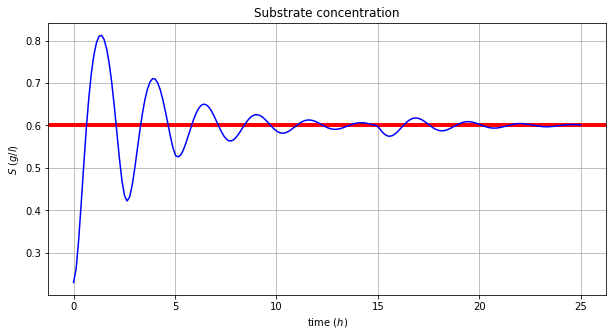

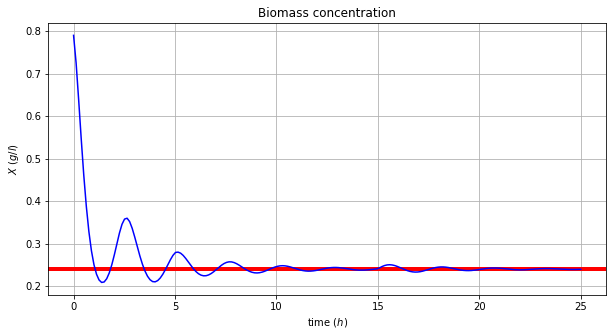

In [5]:
## controller parameters

#--------- Start Modifying Code Here -----------
K_Proportional =                                   # porportional constant
K_Integral     =                                   # integral constant
S_setpoint     =                                 # desired setpoint assigned by the user
#--------- End Modifying Code Here -----------

## Define initial conditions

InitialS            = 0.23   # Initial S concentration [g/l] 
InitialX            = 0.79   # Initial X concentration [g/l]
InitialV            = 5      # Initial volume [ l ] 
Initialx_int        = 0      # Initial action for integral part of the controller

InitialConditions = [
    InitialS,
    InitialX,
    InitialV,
    Initialx_int
    ]

## Define model inputs 

InputS            = 1.2  # Input S concentration [g/l] 
InputX            = 0    # Input X concentration [g/l]
InputF            = 2    # Input flowrate [h-1] 
OutputF           = 2    # Output flowrate [h-1] 

Inputs = [
    InputS,
    InputX,
    InputF,
    OutputF
    ]

X_setpoint     = Y_XS * (InputS - S_setpoint)       # calculated based on operating equilibruim point

## Dynamical Model with PI controller


def BiomassGrowth(x,t):
    
    # Definition of state variables: x[0]: S ; x[1]: X; x[2]: V; x[3]:controller integral action
    
    # Define controller
    D_constant = mu(S_setpoint)
    dx_integral_action = K_Integral * (S_setpoint - x[0])
    
    # Define disturbance
    #--------- Start Modifying Code Here -----------
    if 5<t<15:
        disturbance = 0.1
    else:
        disturbance = 0
    #--------- End Modifying Code Here -----------
    
    D = D_constant + K_Proportional * (S_setpoint - x[0]) + x[3] + disturbance  # control action + disturbance
    
    # Define balances    
    dS = D * (InputS - x[0]) + (-1/Y_XS) * mu(x[0]) * x[1]        # S mass balance
    dX = mu(x[0]) * x[1] - D * x[1]                                # X mass balance
    dV = D*x[2] - OutputF
    
    return [dS, dX, dV, dx_integral_action]

## solve the model

# time steps
ts = np.linspace(0,25,200)

# solver
x = odeint(BiomassGrowth,InitialConditions,ts)

## plot the results

# figure#1 - substrate concentration per time
plt.figure(figsize=(10,5))
OutputS = x[:,0]
plt.axhline(y=S_setpoint, color='r', linewidth=4)
plt.plot(ts, OutputS, color='b')
plt.title('Substrate concentration') 
plt.xlabel('time ($h$)')
plt.ylabel('$S$ ($g/l$)') 
plt.grid()
plt.show()

# figure#2 - biomass concentration per time
plt.figure(figsize=(10,5))
OutputX = x[:,1]
plt.axhline(y=X_setpoint, color='r', linewidth=4)
plt.plot(ts, OutputX, color='b')
plt.title('Biomass concentration') 
plt.xlabel('time ($h$)')
plt.ylabel('$X$ ($g/l$)') 
plt.grid()
plt.show()